PROJECT - Wind Power Analysis in Ireland

cvs from malin head station used 
found :  https://www.met.ie/climate/available-data/historical-data

In [89]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# File name of your extracted CSV
filename = "wind.csv"  

# Try reading with common separators
separators = [',', ';', '\t']

for sep in separators:
    try:
        df = pd.read_csv(filename, sep=sep, engine='python')
        print(f"Successfully read with separator '{sep}'")
        break
    except pd.errors.ParserError:
        print(f"Failed to read with separator '{sep}'")
else:
    raise Exception("Could not read CSV. Check the file format.")

# Show first 5 rows
print("\nFirst 5 rows:")
print(df.head())

# Show column names and types
print("\nData info:")
print(df.info())

# Quick check of the first few lines in case you want to inspect
print("\nColumns:")
print(df.columns)

# Having issues reading data , applied above code to read the data properly




Failed to read with separator ','
Successfully read with separator ';'

First 5 rows:
                     Station Name: MALIN HEAD
0                       Station Height: 20 M 
1         Latitude:55.372  ,Longitude: -7.339
2                     date:   -  00 to 00 utc
3        rain:   -  Precipitation Amount (mm)
4  maxtp:  -  Maximum Air Temperature (C)\t  

Data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25834 entries, 0 to 25833
Data columns (total 1 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Station Name: MALIN HEAD  25834 non-null  object
dtypes: object(1)
memory usage: 202.0+ KB
None

Columns:
Index(['Station Name: MALIN HEAD'], dtype='object')


In [90]:
# LOOKING AT THE DATE THE COLLUMNS ROW STARTS ON ROW 25
# SO SKIPPING THE FIRST 24 ROWS TO SEE IF THAT HELPS
df = pd.read_csv(filename, skiprows=24, sep=',', engine='python')

# Quick check
print(df.head())
print(df.columns)

          date  ind  maxtp  ind.1  mintp igmin gmin  ind.2  rain    cbl  ...  \
0  01-may-1955    0    9.4      0    6.9     0  3.8      0   7.4  996.2  ...   
1  02-may-1955    0   11.2      0    5.7     0  5.9      3   0.0  997.1  ...   
2  03-may-1955    0   13.1      0    4.3     0  0.6      0   6.6  989.6  ...   
3  04-may-1955    0   12.8      0    7.8     0  6.1      0   4.4  978.3  ...   
4  05-may-1955    0   13.2      0    8.1     0  6.6      0   2.7  990.3  ...   

  ind.5  hg sun  glorad    soil   pe evap smd_wd smd_md smd_pd  
0     2  48                      1.0  1.9                       
1     0  31              12.300  1.9  3.6                       
2     0  48               9.200  1.4  2.4                       
3     0  41               9.625  2.0  3.6                       
4     0  34              10.775  2.0  3.4                       

[5 rows x 25 columns]
Index(['date', 'ind', 'maxtp', 'ind.1', 'mintp', 'igmin', 'gmin', 'ind.2',
       'rain', 'cbl', 'wdsp', '

In [91]:
# CHANGE TO ONLY COLUMNS NEEDED FOR WIND ANALYSIS, AND CHANGE COLUMN NAMES TO SOMETHING EASIER UNDERSTAND




# File name
filename = "wind.csv"

# Columns in the CSV that you need
columns_needed = ['date', 'wdsp', 'hm', 'ddhm', 'hg']

# Optional: Rename for easier use
column_rename = {
    'date': 'Date_UTC',
    'wdsp': 'MeanWindSpeed_knots',
    'hm': 'Max10MinWindSpeed_knots',
    'ddhm': 'WindDirection_deg',
    'hg': 'HighestGust_knots'
}

# Read CSV
df = pd.read_csv(
    filename,
    skiprows=24,            # skip metadata
    sep=',',                # adjust if needed
    engine='python',
    usecols=columns_needed, # only read needed columns
    header=0                # first row after skipped rows has column names
)

# Rename columns
df.rename(columns=column_rename, inplace=True)

# Quick preview
print(df.head())
print(df.info())





      Date_UTC MeanWindSpeed_knots Max10MinWindSpeed_knots WindDirection_deg  \
0  01-may-1955                19.2                      34                70   
1  02-may-1955                14.2                      24               310   
2  03-may-1955                14.8                      30               130   
3  04-may-1955                19.9                      27               230   
4  05-may-1955                16.0                      24               240   

  HighestGust_knots  
0                48  
1                31  
2                48  
3                41  
4                34  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25813 entries, 0 to 25812
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Date_UTC                 25813 non-null  object
 1   MeanWindSpeed_knots      25813 non-null  object
 2   Max10MinWindSpeed_knots  25813 non-null  object
 3   WindDirec

In [92]:
# reference to errorcode https://chatgpt.com/c/69604ed9-9d1c-832a-9216-6c5835fcc733, accessed 09-01.26
# couldnt get working , as it was object and had to change all to nummeric floats 


In [93]:
# Convert wind speed columns to numeric, coerce errors to NaN (cleaning data)
wind_columns = ['MeanWindSpeed_knots', 'Max10MinWindSpeed_knots', 'HighestGust_knots']
for col in wind_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')



In [94]:



# now to convert wind speedas to mps
# reference : https://www.inchcalculator.com/convert/knot-to-meter-per-second/ ,accessed 09-01-26
knots_to_mps = 0.51444

#change knots to mps in columns
df['MeanWindSpeed_mps'] = df['MeanWindSpeed_knots'] * knots_to_mps
df['Max10MinWindSpeed_mps'] = df['Max10MinWindSpeed_knots'] * knots_to_mps
df['HighestGust_mps'] = df['HighestGust_knots'] * knots_to_mps


#  Compute theoretical wind power

# reference for air density: https://en.wikipedia.org/wiki/Density_of_air , accessed 09-01-26
air_density = 1.225         # kg/m³
# example size in meters
rotor_diameter = 50    

# A=πr2 area of circle, the larger the rotor the more power
# how to calculate rotor area : https://www.omnicalculator.com/physics/area-of-circle , accessed 09-01-26

# for how to do below using numpy - https://chatgpt.com/c/69604ed9-9d1c-832a-9216-6c5835fcc733 , accessed 09-01-26

rotor_area = np.pi * (rotor_diameter / 2) ** 2 

# Theoretical power in Watts
df['Power_W'] = 0.5 * air_density * rotor_area * df['MeanWindSpeed_mps']**3

# Convert to kW (easier to read)
df['Power_kW'] = df['Power_W'] / 1000


# to check 
print(df[['Date_UTC', 'MeanWindSpeed_mps', 'Power_kW']].head())
print(df.info())







      Date_UTC  MeanWindSpeed_mps     Power_kW
0  01-may-1955           9.877248  1158.894383
1  02-may-1955           7.305048   468.819001
2  03-may-1955           7.613712   530.793160
3  04-may-1955          10.237356  1290.325859
4  05-may-1955           8.231040   670.656472
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25813 entries, 0 to 25812
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date_UTC                 25813 non-null  object 
 1   MeanWindSpeed_knots      25810 non-null  float64
 2   Max10MinWindSpeed_knots  25733 non-null  float64
 3   WindDirection_deg        25813 non-null  object 
 4   HighestGust_knots        25733 non-null  float64
 5   MeanWindSpeed_mps        25810 non-null  float64
 6   Max10MinWindSpeed_mps    25733 non-null  float64
 7   HighestGust_mps          25733 non-null  float64
 8   Power_W                  25810 non-null  float64
 9   Power_kW  

In [95]:
# issue with df no longer column, need to , best to modify dataframe in place(probably better ways to do this)
# reference chatgpt.com,prompt- KeyError: "None of ['Date_UTC'] are in the columns
#  https://chatgpt.com/c/69604ed9-9d1c-832a-9216-6c5835fcc733  accessed 09-01.26

# Ensure Date_UTC is datetime  
df['Date_UTC'] = pd.to_datetime(df['Date_UTC'], errors='coerce')

# Create a new DataFrame with Date_UTC as index
df_time = df.set_index('Date_UTC')




C:\Users\Cheryl\AppData\Local\Temp\ipykernel_24088\2328108367.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date_UTC'] = pd.to_datetime(df['Date_UTC'], errors='coerce')


In [96]:
daily_power = df_time['Power_kW'].resample('D').mean()

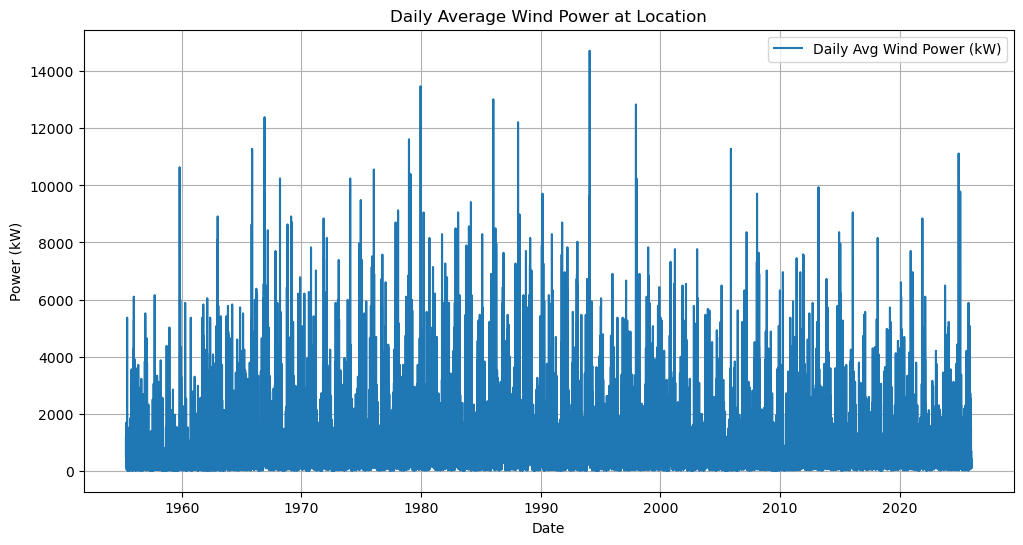

In [97]:
# now to plot the daily average wind power
df.set_index('Date_UTC', inplace=True)
daily_power = df['Power_kW'].resample('D').mean()

plt.figure(figsize=(12,6))
plt.plot(daily_power, label='Daily Avg Wind Power (kW)')
plt.xlabel('Date')
plt.ylabel('Power (kW)')
plt.title('Daily Average Wind Power at Location')
plt.legend()
plt.grid(True)
plt.show()

C:\Users\Cheryl\AppData\Local\Temp\ipykernel_24088\3869072179.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_power = df_time['Power_kW'].resample('Y').mean()
C:\Users\Cheryl\AppData\Local\Temp\ipykernel_24088\3869072179.py:5: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_wind_speed = df_time['MeanWindSpeed_mps'].resample('Y').mean()


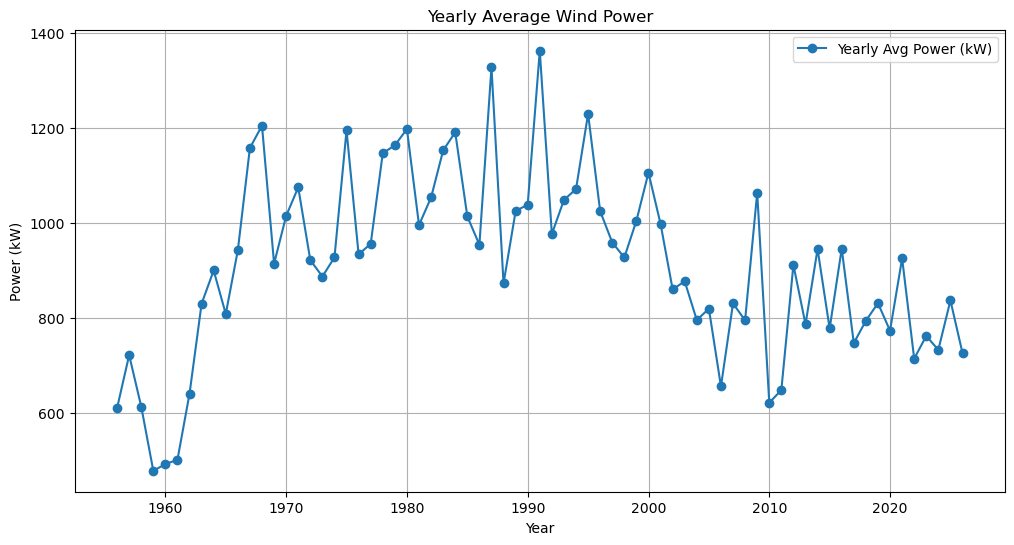

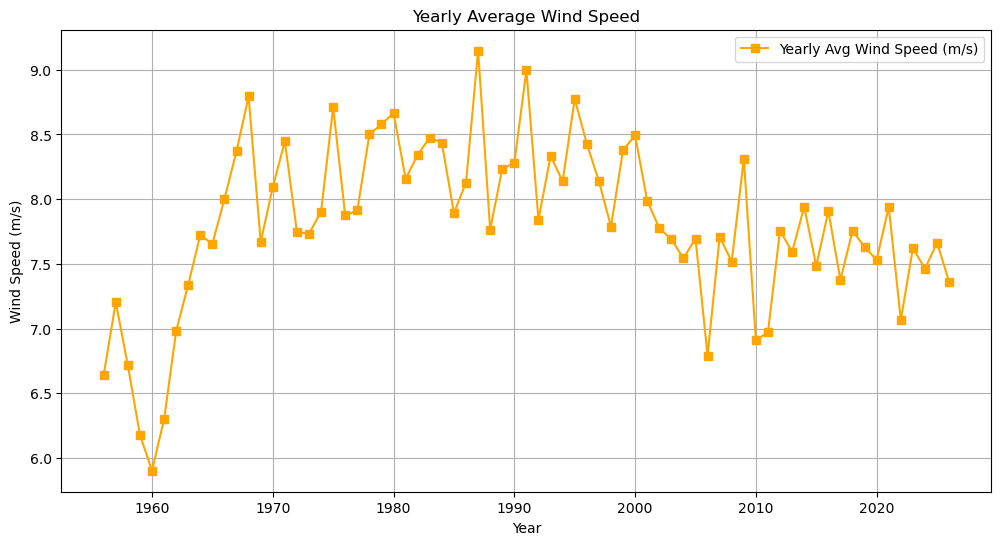

In [ ]:
# Resample the inforamtion to yearly average power


yearly_power = df_time['Power_kW'].resample('Y').mean()

# plot for the average wind speed yearly
yearly_wind_speed = df_time['MeanWindSpeed_mps'].resample('Y').mean()

# Plot yearly average power


plt.figure(figsize=(12,6))
plt.plot(yearly_power.index, yearly_power.values, marker='o', linestyle='-', label='Yearly Avg Power (kW)')
plt.xlabel('Year')
plt.ylabel('Power (kW)')
plt.title('Yearly Average Wind Power')
plt.grid(True)
plt.legend()
plt.show()

# Plot yearly average wind speed


plt.figure(figsize=(12,6))
plt.plot(yearly_wind_speed.index, yearly_wind_speed.values, marker='s', color='orange', label='Yearly Avg Wind Speed (m/s)')
plt.xlabel('Year')
plt.ylabel('Wind Speed (m/s)')
plt.title('Yearly Average Wind Speed')
plt.grid(True)
plt.legend()
plt.show()

# References used to help with this : Chatgpt:https://chatgpt.com/c/69641c2e-5e34-8332-8bad-4c21c01168e5 , accessed 11/01/26.




 From above plots the figures would support the viability of a wind farm using the Requirement found : https://www.pbsnc.org/blogs/science/how-much-wind-does-a-wind-turbine-need/ and https://teagasc.ie/rural-economy/rural-development/diversification/wind-energy/

 "A medium-sized commercial scale turbine for a farm in Ireland may have a tower height of 50m and a rotor diameter of 48m, giving a tip height of 74m, and a rated power output of 800kW."

 "The actual output would normally be in the order of 30% of the theoretical maximum. The wind allows the turbine to produce its rated output over 30% of the year, giving 2.1 million kWh for the 800kW machine per year."

with the above information and the plot above it shows that the average Power produced by the wind at this location over the year would be at max for the medium sized comercial turbine. with the power output being 800kw at max and that being the max output for only 30% of the year , the figures show that it would be viable .

from this plot we can see the power values lowering over the years , so we will need to do some trend analysis to try and predict the next 10 years.



C:\Users\Cheryl\AppData\Local\Temp\ipykernel_24088\242229000.py:8: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_power = df_time['Power_kW'].resample('Y').mean().dropna()
C:\Users\Cheryl\AppData\Local\Temp\ipykernel_24088\242229000.py:30: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  future_years_index = pd.date_range(start=yearly_power.index[0], periods=len(yearly_power) + 10, freq='Y')


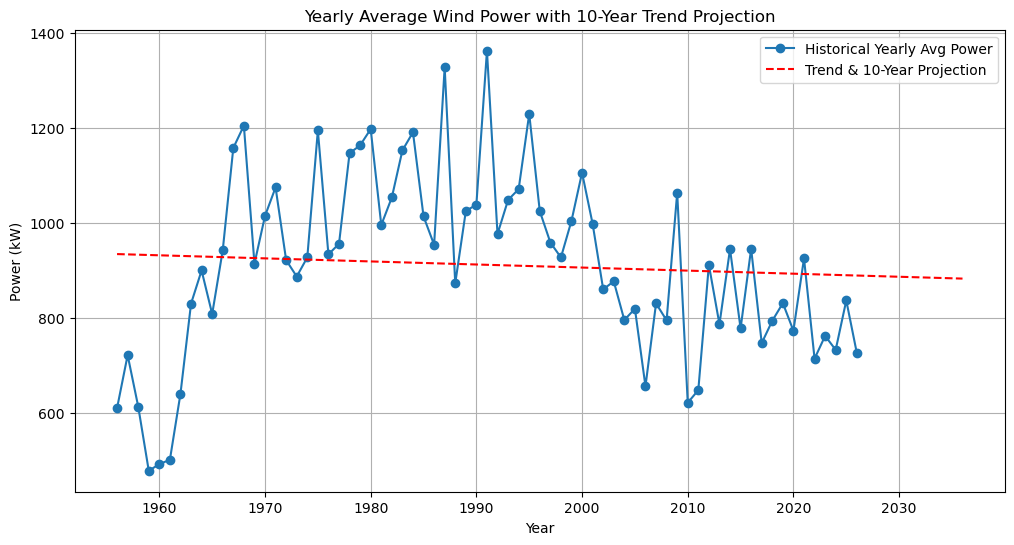

Estimated annual change in power: -0.65 kW/year


In [99]:
from sklearn.linear_model import LinearRegression




# Preparing the yearly data

yearly_power = df_time['Power_kW'].resample('Y').mean().dropna()

# Convert years to numeric (needed for regression)
years_numeric = np.arange(len(yearly_power)).reshape(-1, 1)  # 0, 1, 2, ...
power_values = yearly_power.values


#  Fit linear regression 

model = LinearRegression()
model.fit(years_numeric, power_values)

# Calculate trend for historical years for dataset
trend_historical = model.predict(years_numeric)

# Extrapolate for next 10 years

future_years_numeric = np.arange(len(yearly_power) + 10).reshape(-1, 1)
trend_future = model.predict(future_years_numeric)

# Build future datetime index
last_year = yearly_power.index[-1].year
future_years_index = pd.date_range(start=yearly_power.index[0], periods=len(yearly_power) + 10, freq='Y')


# Plot results

plt.figure(figsize=(12,6))
plt.plot(yearly_power.index, yearly_power.values, marker='o', linestyle='-', label='Historical Yearly Avg Power')
plt.plot(future_years_index, trend_future, '--', color='red', label='Trend & 10-Year Projection')
plt.xlabel('Year')
plt.ylabel('Power (kW)')
plt.title('Yearly Average Wind Power with 10-Year Trend Projection')
plt.grid(True)
plt.legend()
plt.show()


# Show estimated yearly change

print(f"Estimated annual change in power: {model.coef_[0]:.2f} kW/year")

# Reference: Chatgpt: prompt - please do trend for the next 10 years https://chatgpt.com/c/69641c2e-5e34-8332-8bad-4c21c01168e5 , accessed 11/01/26.


As seen above the the estimated trend from historic data predicts the annual decrease of -0.65 kw a year .
this would still be viable for the next 10 years as it would still make the required power needs , but may be issues after the 10 year mark if the estimations are correct.

Summary of all finding in read.me section